In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Mentorship program/project/cleaned data/gurgaon_properties_cleaned_v2.csv")

In [3]:
df.shape

(3803, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [5]:
df.duplicated().sum()

126

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3049,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,Super Built up area 780(72.46 sq.m.),2,2,2,...,780.0,NaN,NaN,0,0,0,0,0,0,0
1036,flat,smart world orchard,sector 61,1.58,13739.0,1150.0,Carpet area: 1150 (106.84 sq.m.),2,2,2,...,NaN,NaN,1150.0,1,0,0,0,0,0,15
2737,flat,paras dews,sector 106,1.13,6406.0,1764.0,Super Built up area 1760(163.51 sq.m.)Built Up...,3,4,3+,...,1760.0,1186.0,1130.0,1,1,0,0,0,0,49
133,flat,vatika iris floors,sector 82,0.63,5590.0,1127.0,Super Built up area 1134(105.35 sq.m.),2,2,3+,...,1134.0,NaN,NaN,1,0,0,0,0,0,110
2636,flat,godrej aria,sector 79,1.10,7772.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,...,1351.0,NaN,NaN,0,0,0,0,0,1,49


<AxesSubplot:>

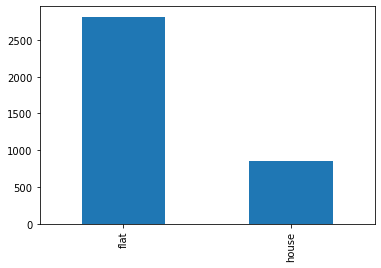

In [8]:
df['property_type'].value_counts().plot(kind='bar')

## Society 

In [9]:
df['society'].value_counts().shape

(676,)

In [10]:
df['society'].value_counts()

independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: society, Length: 676, dtype: int64

In [11]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)


tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: society, Length: 75, dtype: float64

In [12]:
society_counts=df['society'].value_counts()

frequency_bins= {
    'very_high(>100)':(society_counts > 100).sum(),
    'high(>50-100)' :((society_counts>=50)&(society_counts<=100)).sum(),
    'average(10-49)':((society_counts>=10)&(society_counts<=50)).sum(),
    'low(2-9)':((society_counts>1)&(society_counts<10)).sum(),
    'low(1)':(society_counts==1).sum()
}
frequency_bins

{'very_high(>100)': 1,
 'high(>50-100)': 2,
 'average(10-49)': 92,
 'low(2-9)': 273,
 'low(1)': 308}

<AxesSubplot:>

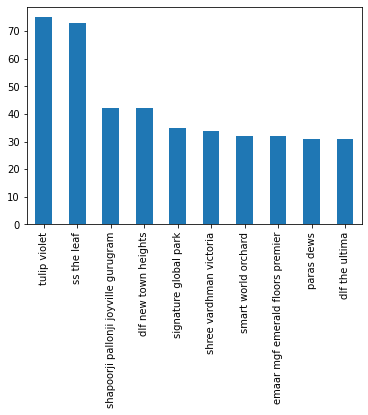

In [13]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [14]:
df['society'].isnull().sum()

1

In [15]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


## sector 

In [16]:
df['sector'].value_counts().shape

(104,)

<AxesSubplot:>

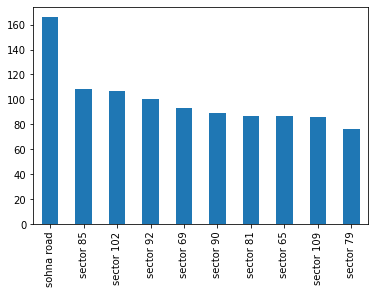

In [17]:
df['sector'].value_counts().head(10).plot(kind='bar')

In [18]:
sector_counts=df['sector'].value_counts()

frequency_bins= {
    'very_high(>100)':(sector_counts > 100).sum(),
    'high(>50-100)' :((sector_counts>=50)&(sector_counts<=100)).sum(),
    'average(10-49)':((sector_counts>=10)&(sector_counts<=50)).sum(),
    'low(2-9)':((sector_counts>1)&(sector_counts<10)).sum(),
    'low(1)':(sector_counts==1).sum()
}
frequency_bins


{'very_high(>100)': 3,
 'high(>50-100)': 25,
 'average(10-49)': 62,
 'low(2-9)': 16,
 'low(1)': 0}

## price 

In [19]:
df['price'].isnull().sum()

17

In [20]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

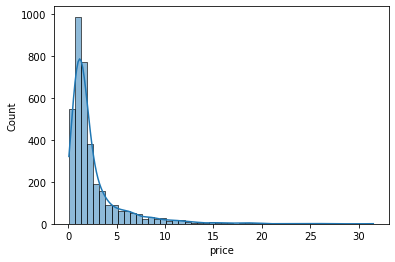

In [21]:
sns.histplot(df['price'],kde=True,bins=50)

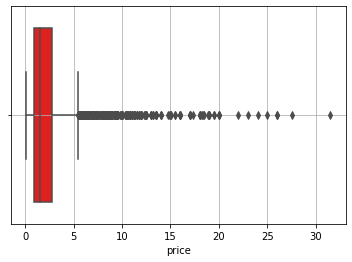

In [22]:
sns.boxplot(x=df['price'],color='red')
plt.grid()

In [23]:
skewness=df['price'].skew()
kurtosis=df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


In [24]:
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

IQR = Q3-Q1

IQR

1.8

In [25]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(lower_bound,upper_bound)

-1.7500000000000002 5.45


In [26]:
outliers=df[(df['price']<lower_bound) | (df['price']>upper_bound)]
outliers.shape

(425, 23)

In [27]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

<AxesSubplot:>

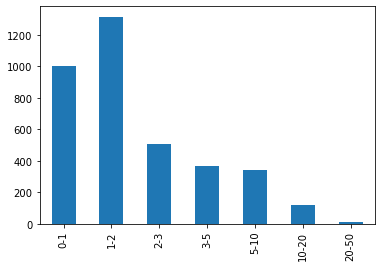

In [28]:
bins = [0,1,2,3,5,10,20,50]
bin_labels=['0-1','1-2','2-3','3-5','5-10','10-20','20-50']
pd.cut(df['price'],bins=bins, labels=bin_labels ,right=False).value_counts().sort_index().plot(kind='bar')

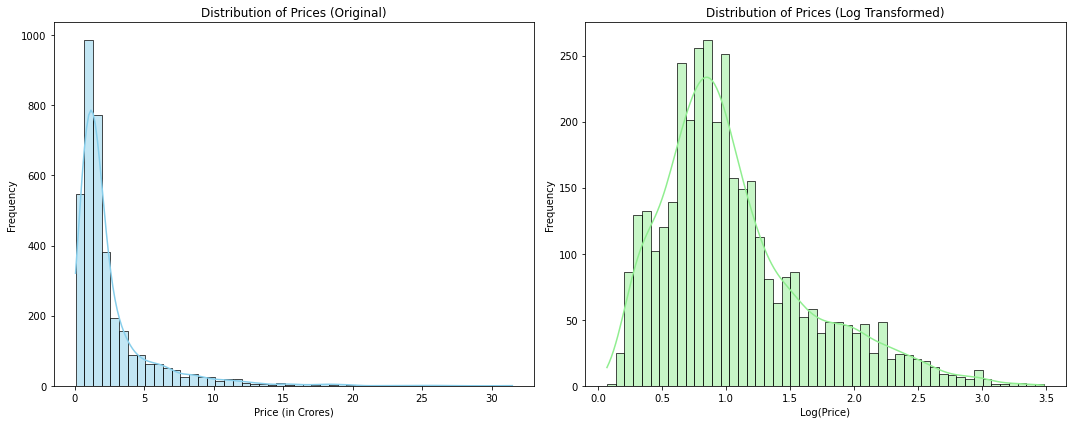

In [29]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [34]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of price(log_transformation)')

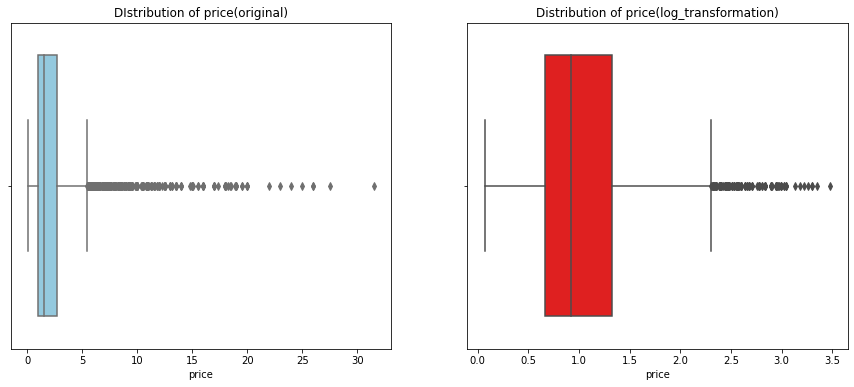

In [41]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(df['price'],color='skyblue')
plt.title('DIstribution of price(original)')

plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']),color='red')
plt.title('Distribution of price(log_transformation)')

## price_per_sqft

In [43]:
df['price_per_sqft'].isnull().sum()

17

In [44]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

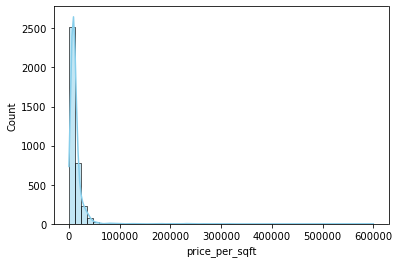

In [46]:
sns.histplot(df['price_per_sqft'],kde=True,bins=50,color='skyblue')

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

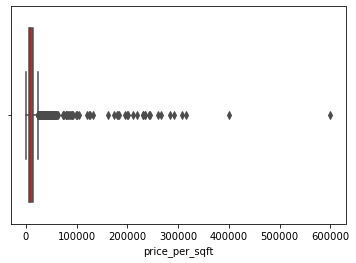

In [47]:
sns.boxplot(df['price_per_sqft'],color='red')

The box plot shows the several outliers ,especially on the higher side . The INterquartile range is relatively compact,but ther are many data point beyind the whiskers of the box plot,indicating potential outlier

## bedroom 

In [48]:
df['bedRoom'].isnull().sum()

0

In [49]:
df['bedRoom'].describe()

count    3677.000000
mean        3.360076
std         1.897629
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

<AxesSubplot:>

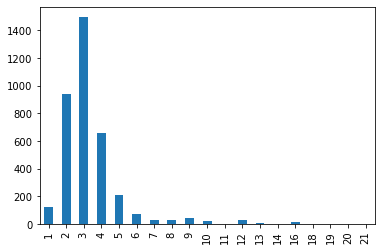

In [52]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:ylabel='bedRoom'>

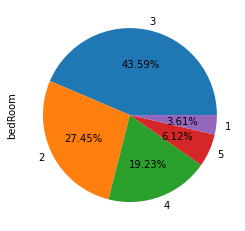

In [57]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [59]:
 df['bathroom'].isnull().sum()

0

<AxesSubplot:>

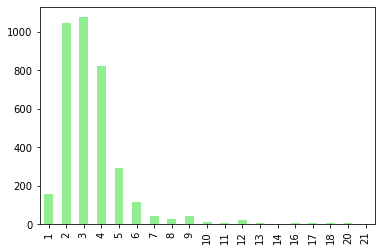

In [60]:
df['bathroom'].value_counts().sort_index().plot(kind='bar',color='lightgreen')

<AxesSubplot:ylabel='bathroom'>

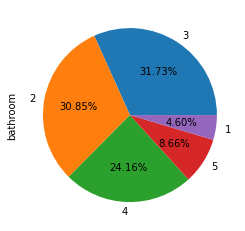

In [66]:
df['bathroom'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## balcony

In [68]:
df['balcony'].isnull().sum()

0

<AxesSubplot:>

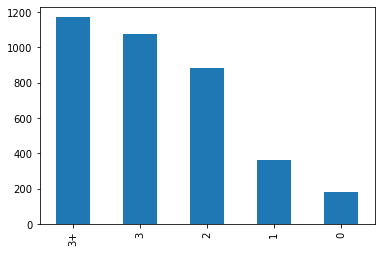

In [69]:
df['balcony'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='balcony'>

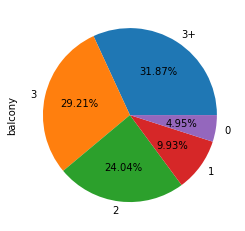

In [71]:
df['balcony'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

In [76]:
df.iloc[:,9:].head(5)

,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [77]:
df['floorNum'].isnull().sum()

19

In [78]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<AxesSubplot:>

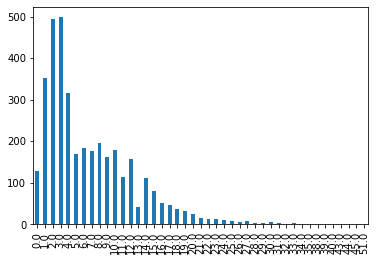

In [79]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floorNum'>

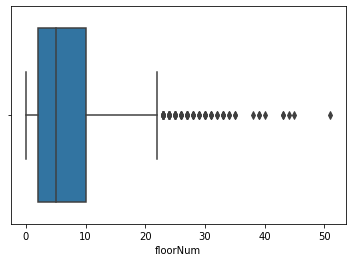

In [80]:
sns.boxplot(df['floorNum'],)

## Facing

In [81]:
df['facing'].isnull().sum()

1045

In [84]:
df['facing'].fillna('NA',inplace=True)

In [85]:
df['facing'].value_counts()

NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

## age possession

In [86]:
df['agePossession'].isnull().sum()

0

In [87]:
df['agePossession'].value_counts()

Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: agePossession, dtype: int64

<AxesSubplot:>

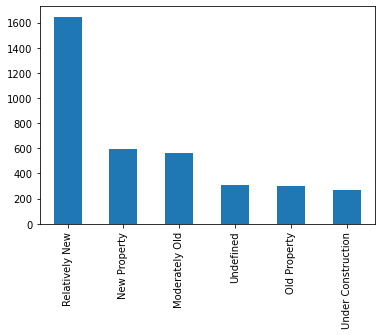

In [88]:
df['agePossession'].value_counts().plot(kind='bar')

## area

In [90]:
#super_builtup_area
df['super_built_up_area'].isnull().sum()

1802

In [91]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<AxesSubplot:xlabel='super_built_up_area', ylabel='Count'>

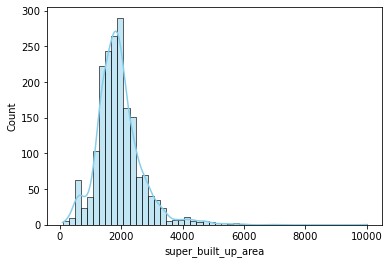

In [93]:
sns.histplot(df['super_built_up_area'].dropna(),bins=50,kde=True,color='skyblue')

<AxesSubplot:xlabel='super_built_up_area'>

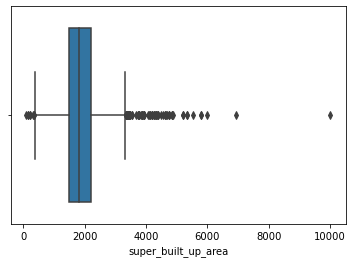

In [96]:
sns.boxplot(df['super_built_up_area'].dropna())

In [97]:
#built_up_area
df['built_up_area'].isnull().sum()


1987

In [98]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area'>

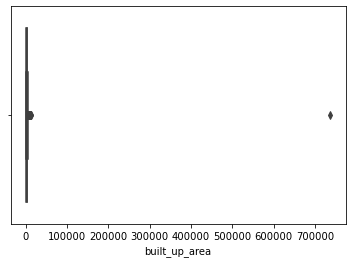

In [99]:
sns.boxplot(df['built_up_area'].dropna())

<AxesSubplot:xlabel='built_up_area', ylabel='Count'>

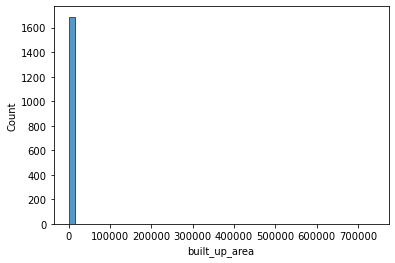

In [102]:
sns.histplot(df['built_up_area'].dropna(),kde=False,bins=50)

In [103]:
#carpet
df['carpet_area'].isnull().sum()

1805

In [104]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<AxesSubplot:xlabel='carpet_area', ylabel='Count'>

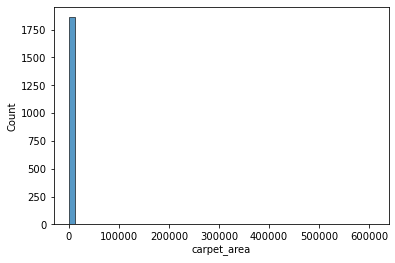

In [107]:
sns.histplot(df['carpet_area'].dropna(),kde=False,bins=50)

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carpet_area'>

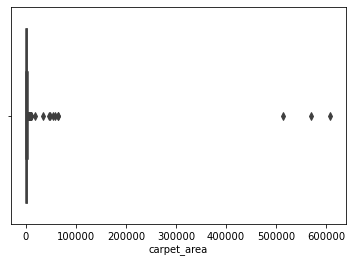

In [108]:
sns.boxplot(df['carpet_area'].dropna())

In [110]:
df.iloc[:,15:].head(5)

,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,650.0,0,0,0,0,0,0,8
1,1103.0,1,1,0,0,0,0,38
2,58141.0,0,0,0,0,0,0,15
3,585.0,0,0,0,0,0,0,49
4,1476.0,0,1,0,0,1,1,174


## additional rooms

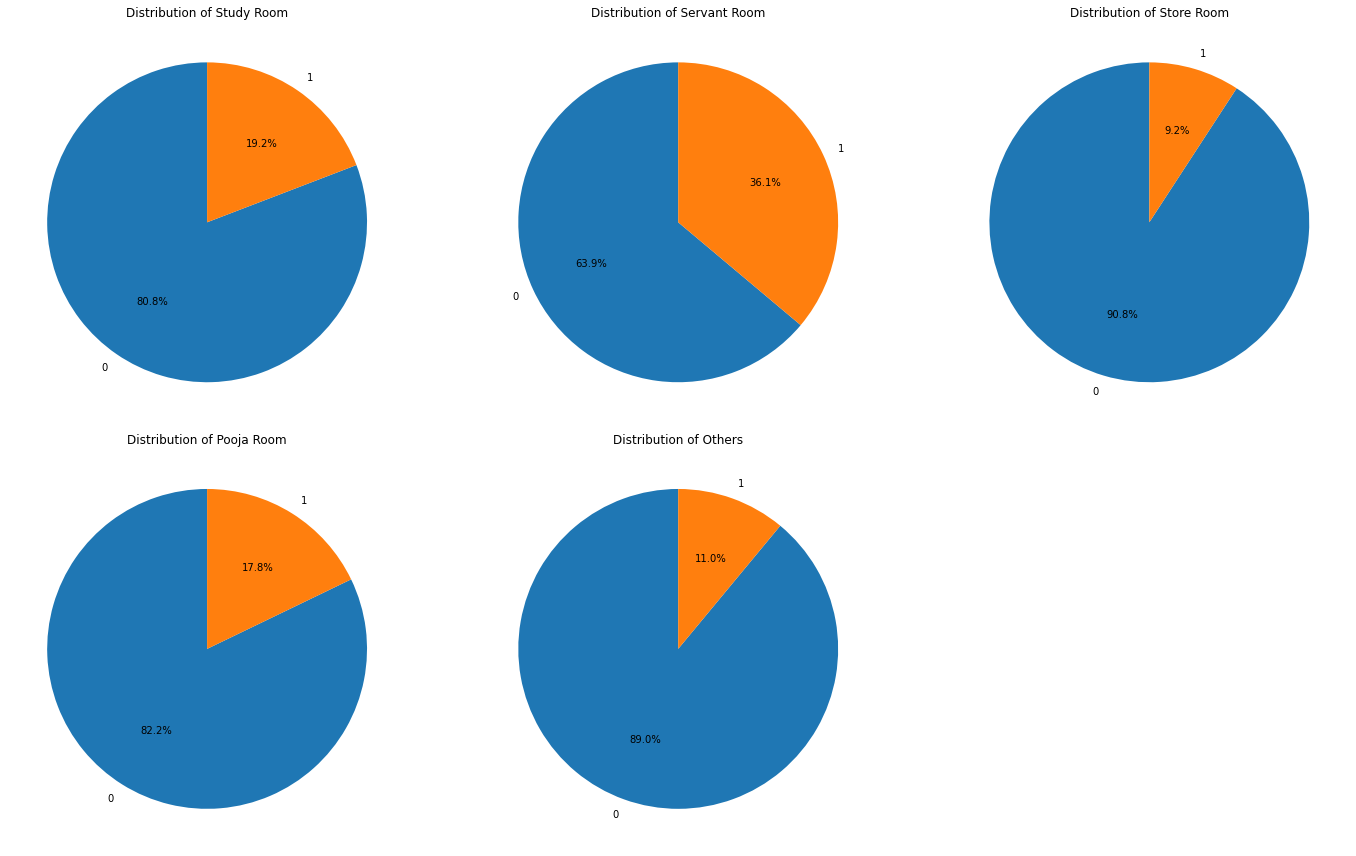

In [113]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

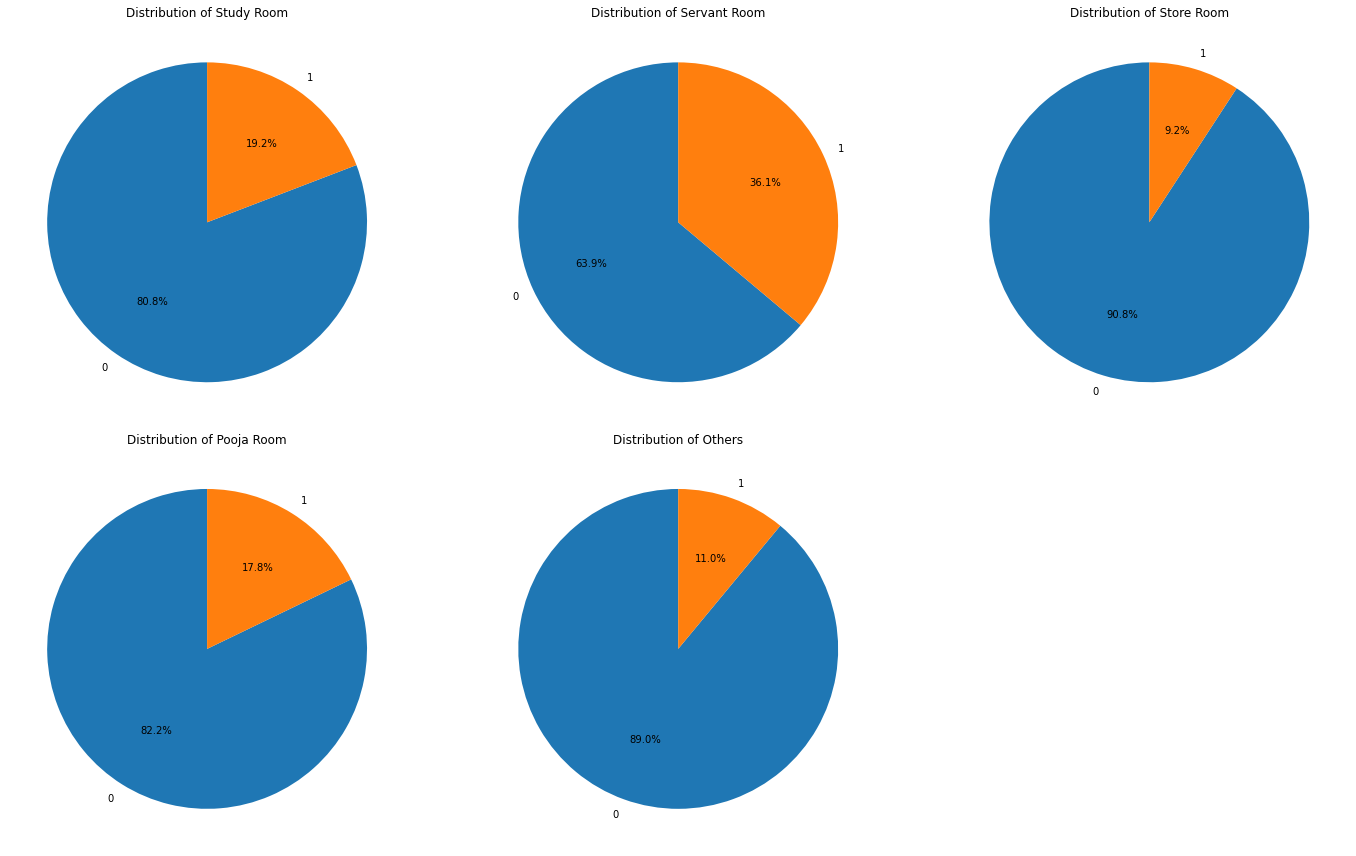

In [124]:
plt.figure(figsize=(20,12))

for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax=plt.subplot(2,3,idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')
    

plt.tight_layout()
plt.show()
    

## furnishing

In [125]:
df['furnishing_type'].isnull().sum()

0

In [127]:
df['furnishing_type'].value_counts()

0    2411
1    1059
2     207
Name: furnishing_type, dtype: int64

<AxesSubplot:ylabel='furnishing_type'>

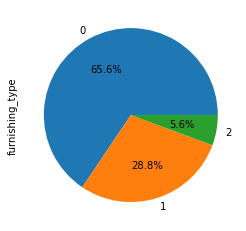

In [128]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## luxury_score 

In [130]:
df['luxury_score'].isnull().sum()

0

In [131]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<AxesSubplot:xlabel='luxury_score', ylabel='Count'>

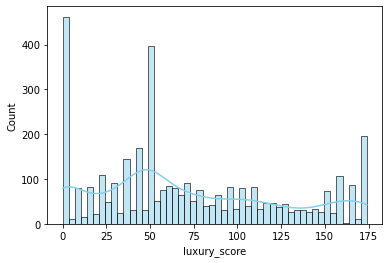

In [132]:
sns.histplot(df['luxury_score'],color='skyblue',bins=50,kde=True)

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

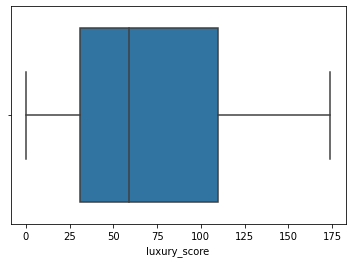

In [133]:
sns.boxplot(df['luxury_score'])